In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split

In [2]:
def loss(W,x,y):  #loss function，最小二乘法
    y_=x*W
    l=np.mean(np.square(y_-y))
    return l


In [6]:
def get_data(dir):
    data = load_svmlight_file(dir)
    return data[0], data[1]


dir="./housing_scale"
x,y=get_data(dir)


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30) #分割数据集

x_train=x_train.todense()  #变成稠密矩阵，方便运算
x_train=np.column_stack((np.ones(x_train.shape[0]),x_train)) #加上一列偏置
y_train=np.transpose(np.mat(y_train))

#print(np.column_stack((np.ones(x_train.shape[0]),x_train)))

x_test=x_test.todense()
x_test=np.column_stack((np.ones(x_test.shape[0]),x_test))
y_test=np.transpose(np.mat(y_test))


def gradient(w,x,y,lamda):
    #print(x_train.T*(y-x_train*w))
    return lamda*w-x_train.T*(y-x_train*w)

origin_w=np.random.standard_normal([14,1])

In [66]:
#w=np.zeros([14,1])
w=origin_w
eta=0.001
lamda=1
epoch=200
loss_train=[]
loss_test=[]
for i in range(epoch):
    g=gradient(w,x_train,y_train,lamda)
    w=w-eta*g;  #梯度下降公式，带正则项
    #print(loss(w,x_test,y_test))
    loss_train.append(loss(w,x_train,y_train))   #把每次迭代的训练集的loss加入到list里面，方便最后画图，下同
    loss_test.append(loss(w,x_test,y_test))

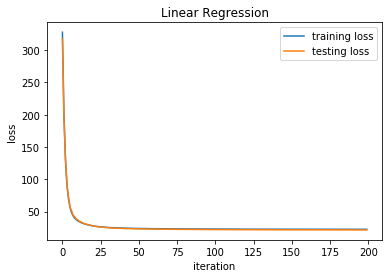

In [67]:
iteration=list(range(epoch))

plt.figure()
l1,=plt.plot(iteration,loss_train,label="training loss")
l2,=plt.plot(iteration,loss_test,label="testing loss")
plt.legend(handles = [l1, l2,], labels = ['training loss', 'testing loss'])
plt.xlabel("iteration")
plt.ylabel("loss")
plt.title("Linear Regression")
plt.show()


In [68]:
print(loss_train[-1])
print(loss_test[-1])
print(x_train.shape[0])
print(x_test.shape[0])

22.5689552865
21.627049656
354
152
